In [ ]:
!pip install tweepy textblob nltk scikit-learn matplotlib seaborn wordcloud


In [ ]:
import tweepy
import nltk
import re
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Twitter API authentication
api_key = '85EcyJTTepdr7LL14FdCeYdrw'
api_secret = '536Ny3VOmm7wh6u2cAgWrH55auPtM9AK7KKZOApm3vd5OKNCZa'
access_token = '1290927509735800835-tHgZHJHEUrViurXWIZ6424Z1StsMne'
access_secret = 'fNLnfEo7oTa8CL8nEUIg1DP0zNL4KEuXluhCz4FuHuIu6'

auth = tweepy.OAuth1UserHandler(api_key, api_secret, access_token, access_secret)
api = tweepy.API(auth)


In [ ]:
import tweepy

# Paste your bearer token here
bearer_token = "AAAAAAAAAAAAAAAAAAAAAILytwEAAAAAykmY8TsGUqN9I4KTSVoYgjKvRf4%3D4sESmD4KXf066Nzfy78V7PQ5GsTSJjqqPUa4jyqoGs27lSOGSA"

client = tweepy.Client(bearer_token=bearer_token)

# Query to search for tweets
query = "AI -is:retweet lang:en"

# Fetch 100 tweets using v2 API
response = client.search_recent_tweets(query=query, max_results=100, tweet_fields=["text"])

# Extract text from tweets
tweet_texts = [tweet.text for tweet in response.data]
print(tweet_texts[:5])



['@ItIsHoeMath I’m here for it.\n\nThe biggest mistake in AI was not letting it run free, with zero bias, like teaching a toddler not to touch the stove or run into the street.', '@bmcnett AI made us language/framework agnostic', 'Artificial intelligence has the potential to transform the energy sector in the coming decade, driving a surge in electricity demand from data centres.\n\nElectricity use from AI-optimised data centres is projected to more than quadruple by 2030.\n\nMore 👉 https://t.co/xOPzZnKlLz https://t.co/sE61JMq9gm', '@Femi_Sorry 🤣🫤🙄😂✨\nNo Femi — no Barbie For you is this AI 🤖? I see a lot of these tweets now ??', '4️⃣ – I used AI to write faster: DeepSeek and ChatGPT handle the heavy lifting so I don’t get stuck.']


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+", "", text)          # remove URLs
    text = re.sub(r"@\w+", "", text)             # remove mentions
    text = re.sub(r"#", "", text)                # remove hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text)      # remove special characters
    text = text.lower()                          # lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

cleaned_tweets = [clean_text(tweet) for tweet in tweet_texts]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

sentiments = [get_sentiment(tweet) for tweet in cleaned_tweets]


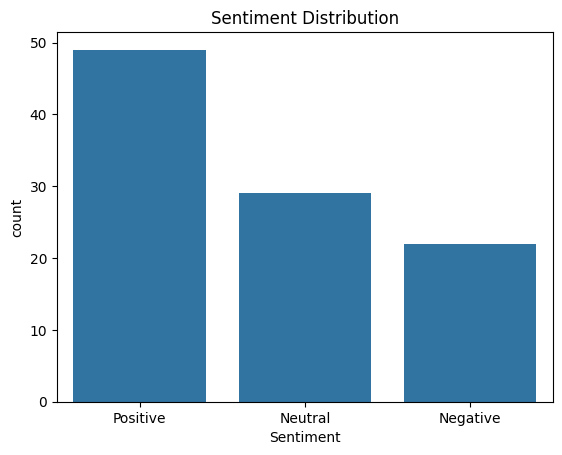

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Original Tweet': tweet_texts,
    'Cleaned Tweet': cleaned_tweets,
    'Sentiment': sentiments
})

# Visualize
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_tweets)
y = sentiments


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.3

Classification Report:
               precision    recall  f1-score   support

    Negative       0.14      0.14      0.14         7
     Neutral       0.40      0.40      0.40         5
    Positive       0.38      0.38      0.38         8

    accuracy                           0.30        20
   macro avg       0.31      0.31      0.31        20
weighted avg       0.30      0.30      0.30        20



In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
# app.py

import streamlit as st
from textblob import TextBlob
import re

# Clean function
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = text.lower()
    return text

# Sentiment function
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Streamlit UI
st.title("Twitter Sentiment Analysis")
tweet = st.text_area("Enter a tweet")

if st.button("Analyze"):
    cleaned = clean_text(tweet)
    sentiment = get_sentiment(cleaned)
    st.write("Cleaned Tweet:", cleaned)
    st.success(f"Sentiment: {sentiment}")


2025-04-21 13:16:12.212 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 13:16:13.536 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-21 13:16:13.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 13:16:13.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 13:16:13.549 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 13:16:13.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 13:16:13.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 13:16:13.555 Session state does not 

In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
!pip install gradio

import gradio as gr

def analyze_sentiment(tweet):
    cleaned = clean_text(tweet)
    sentiment = get_sentiment(cleaned)
    return f"Sentiment: {sentiment}\n\nCleaned Tweet: {cleaned}"

gr.Interface(fn=analyze_sentiment, inputs="text", outputs="text", title="Twitter Sentiment Analyzer").launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.4 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://591781eb105e2706c8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory t